In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1212,ham,"Yo, the game almost over? Want to go to walmar...",NaN,NaN,NaN
1651,ham,I wan but too early lei... Me outside now wun ...,NaN,NaN,NaN
2936,ham,Lol yep did that yesterday. Already got my fir...,NaN,NaN,NaN
894,ham,Doesn't g have class early tomorrow and thus s...,NaN,NaN,NaN
1065,ham,No my mum went 2 dentist.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#Steps to be followed:
#>data cleaning
#>Data analysis
#>Text Preprocessing
#>Model building
#>Evaluation
#>Improvement
#>Website
#>Deploy

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(6)

,v1,v2
3460,ham,K.. I yan jiu liao... Sat we can go 4 bugis vi...
4924,ham,Ok... Let u noe when i leave my house.
5488,ham,K. I will sent it again
3174,spam,UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 a...
5125,ham,After my work ah... Den 6 plus lor... U workin...
4407,ham,Take care and sleep well.you need to learn to ...


In [9]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1477,ham,Why you keeping me away like this
4227,ham,Have you started in skye
2428,ham,She.s find. I sent you an offline message to k...
425,ham,Ok. She'll be ok. I guess
2424,ham,Oh k k:)but he is not a big hitter.anyway good


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#checking for dupliacted values
df.duplicated().sum()

403

In [15]:
#removing the duplicated values
df=df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

## Data Analysis

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

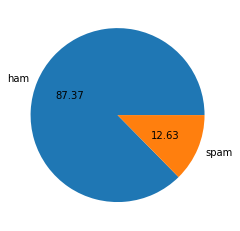

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Here the data is imbalanced

In [20]:
import nltk

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
#num of words:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [28]:
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
# spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

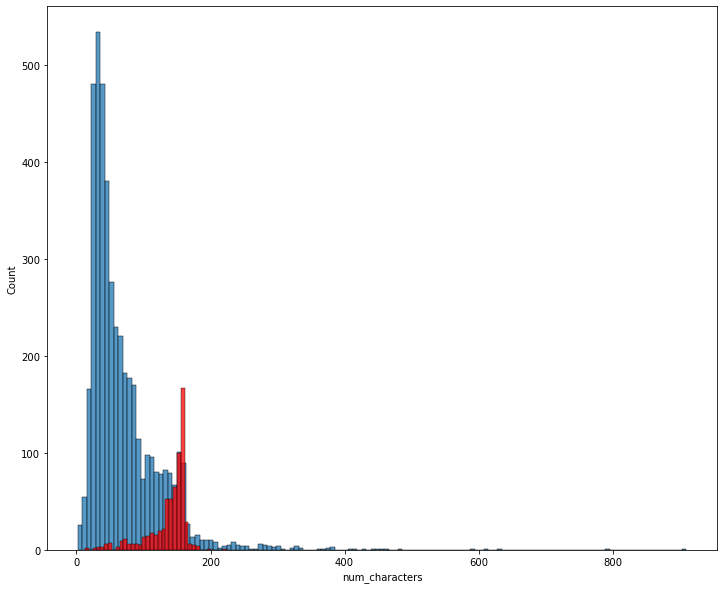

In [31]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color="red")

<AxesSubplot:xlabel='num_words', ylabel='Count'>

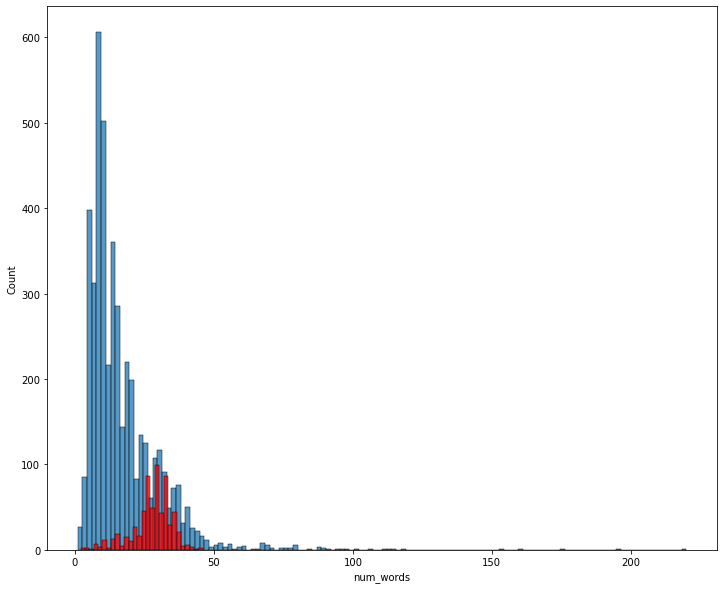

In [32]:
plt.figure(figsize=(12,10))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color="red")

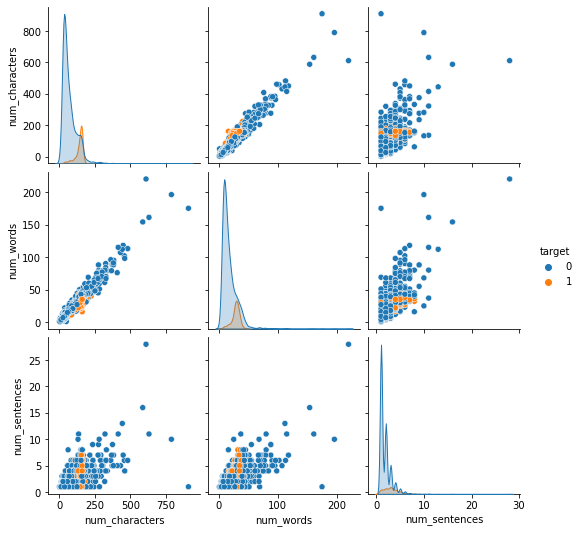

In [33]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

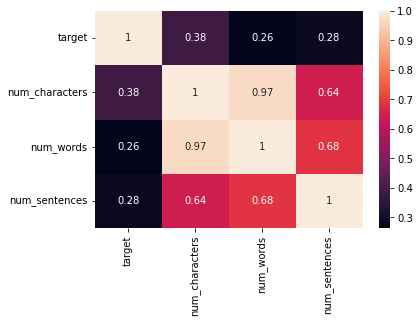

In [34]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing 

In [35]:
from nltk.corpus import stopwords
import string

In [36]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [37]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    str=[]
    for i in text:
        if i.isalnum():
            str.append(i)
            
    text=str[:]
    str.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            str.append(i)
    
    text=str[:]
    str.clear()
    
    for i in text:
        str.append(ps.stem(i))
            
    return " ".join(str)

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
from wordcloud import WordCloud
wc=WordCloud(width=400,height=400,min_font_size=10,background_color='white')  

In [41]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

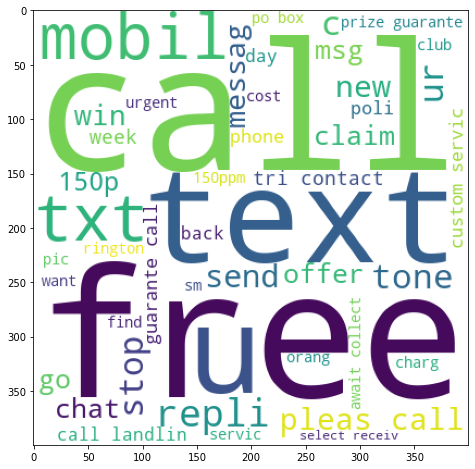

In [42]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [43]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

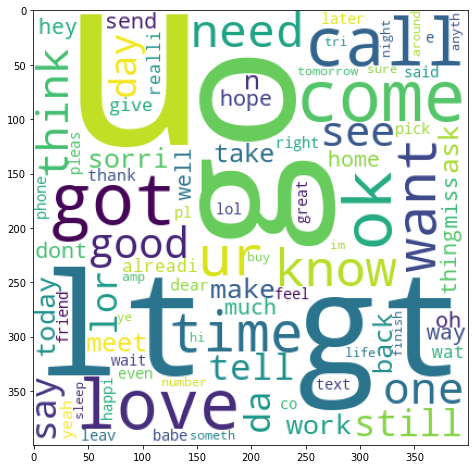

In [44]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [45]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


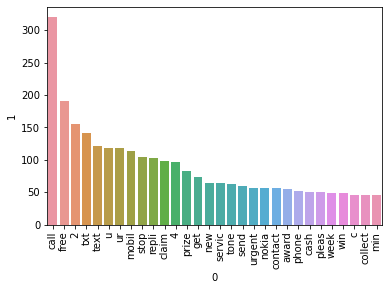

In [47]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35394

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


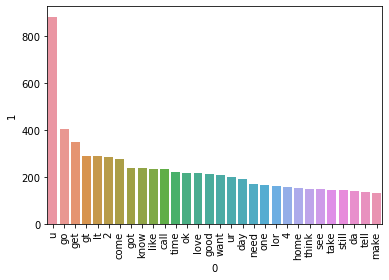

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [52]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 3000)

In [54]:
y=df['target'].values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [59]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [60]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [61]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [62]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))